### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.

In [1]:
#model.compile(optimizer='adam',
 #             loss='sparse_categorical_crossentropy',
  #            metrics=['accuracy'])

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.color import rgb2gray, gray2rgb

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)
print('x_train.max():', x_train.max())
print('x_train.min():', x_train.min())
print('x_test.max():', x_test.max())
print('x_test.min():', x_test.min())

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
x_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)
x_train.max(): 255
x_train.min(): 0
x_test.max(): 255
x_test.min(): 0


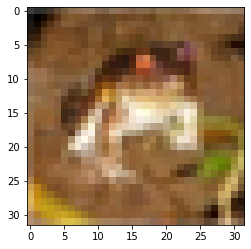

In [4]:
plt.imshow(x_train[0]);

In [5]:
x_train = rgb2gray(x_train)
x_test = rgb2gray(x_test)

# Esto no solo reduce la dimensionalidad de colores sino que también normaliza.

In [6]:
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('x_train.max():', x_train.max())
print('x_train.min():', x_train.min())
print('x_test.max():', x_test.max())
print('x_test.min():', x_test.min())

x_train.shape: (50000, 32, 32)
x_test.shape: (10000, 32, 32)
x_train.max(): 1.0
x_train.min(): 0.0
x_test.max(): 1.0
x_test.min(): 0.0


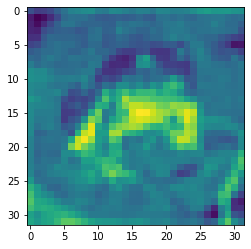

In [7]:
plt.imshow(x_train[0]);

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


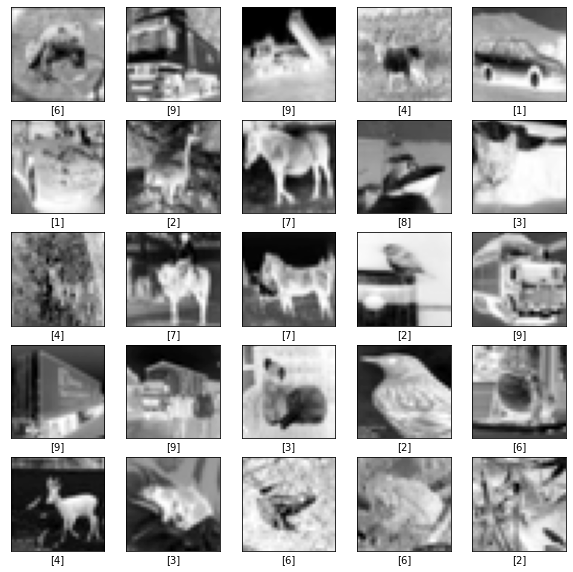

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show();

In [9]:
x_train[0].shape

(32, 32)

In [10]:
print('x_train.shape:', x_train.shape)

x_train.shape: (50000, 32, 32)


In [11]:
x_train[0]

array([[0.24092   , 0.17760941, 0.18848824, ..., 0.53252784, 0.50619294,
        0.50033686],
       [0.07509804, 0.        , 0.03744392, ..., 0.36493412, 0.34615961,
        0.36186078],
       [0.09410275, 0.03297176, 0.11884353, ..., 0.34813176, 0.34979843,
        0.30750941],
       ...,
       [0.6774102 , 0.60635333, 0.62403529, ..., 0.52625569, 0.13561608,
        0.14520824],
       [0.56710667, 0.50111725, 0.56747294, ..., 0.59512392, 0.26438706,
        0.22747098],
       [0.58428902, 0.52848627, 0.5721451 , ..., 0.73579451, 0.48063176,
        0.38096275]])

In [12]:
model1 = models.Sequential()

model1.add(layers.Conv2D(filters=8,
                         kernel_size=(3,3),
                         input_shape=(32,32,1)))
model1.add(layers.MaxPooling2D(pool_size = (2,2)))
model1.add(layers.Dropout(0.25))
model1.add(layers.Flatten())
model1.add(layers.Dense(32))
model1.add(layers.Dense(10, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                57632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 58,042
Trainable params: 58,042
Non-trainable params: 0
____________________________________________________

In [13]:
model1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [14]:
x_train = x_train.reshape(50000, 32, 32, 1)
print('x_train.shape:', x_train.shape)
x_test = x_test.reshape(10000, 32, 32, 1)
print('x_test.shape:', x_test.shape)

x_train.shape: (50000, 32, 32, 1)
x_test.shape: (10000, 32, 32, 1)


In [15]:
model1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8154 - accuracy: 0.3638
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6126 - accuracy: 0.4395
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5499 - accuracy: 0.4621
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5072 - accuracy: 0.4803
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4839 - accuracy: 0.4890
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4633 - accuracy: 0.4957
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4463 - accuracy: 0.5039
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4368 - accuracy: 0.5076
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4266 - accuracy: 0.5075
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.414

In [16]:
test_loss1, test_acc1 = model1.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 1.3944 - accuracy: 0.5246


---
# Modelo 2

In [17]:
model2 = models.Sequential()

model2.add(layers.Conv2D(filters=8,
                         kernel_size=(3,3),
                         input_shape=(32,32,1)))
model2.add(layers.MaxPooling2D(pool_size = (2,2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(16))
model2.add(layers.Dense(32))
model2.add(layers.Dense(10, activation = 'softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                28816     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [18]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7993 - accuracy: 0.3586
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6251 - accuracy: 0.4334
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5755 - accuracy: 0.4494
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5419 - accuracy: 0.4649
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5205 - accuracy: 0.4742
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4982 - accuracy: 0.4835
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4848 - accuracy: 0.4874
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4719 - accuracy: 0.4952
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4548 - accuracy: 0.5011
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.44

In [20]:
test_loss2, test_acc2 = model2.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 1.4216 - accuracy: 0.5123


## Evaluación de los modelos

In [21]:
test_loss1, test_acc1 = model1.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 1.3944 - accuracy: 0.5246


In [22]:
test_loss2, test_acc2 = model2.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 1.4216 - accuracy: 0.5123


## Predicciones

In [23]:
predictions1 = model1.predict(x_test)

In [24]:
predictions2 = model2.predict(x_test)

In [25]:
predictions1[0]

array([0.01648902, 0.00667801, 0.01836142, 0.1786471 , 0.01839926,
       0.08060705, 0.42965454, 0.11654305, 0.03829931, 0.09632126],
      dtype=float32)

In [26]:
predictions2[0]

array([0.11223874, 0.00617857, 0.03349113, 0.18797237, 0.0400884 ,
       0.0480548 , 0.32798418, 0.0784447 , 0.10422742, 0.06131969],
      dtype=float32)

8

In [49]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Gráfica para modelo 1

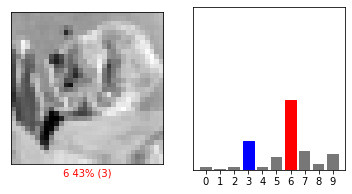

In [50]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  y_test)
plt.show()

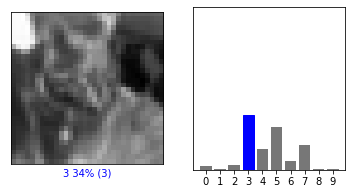

In [51]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  y_test)
plt.show()

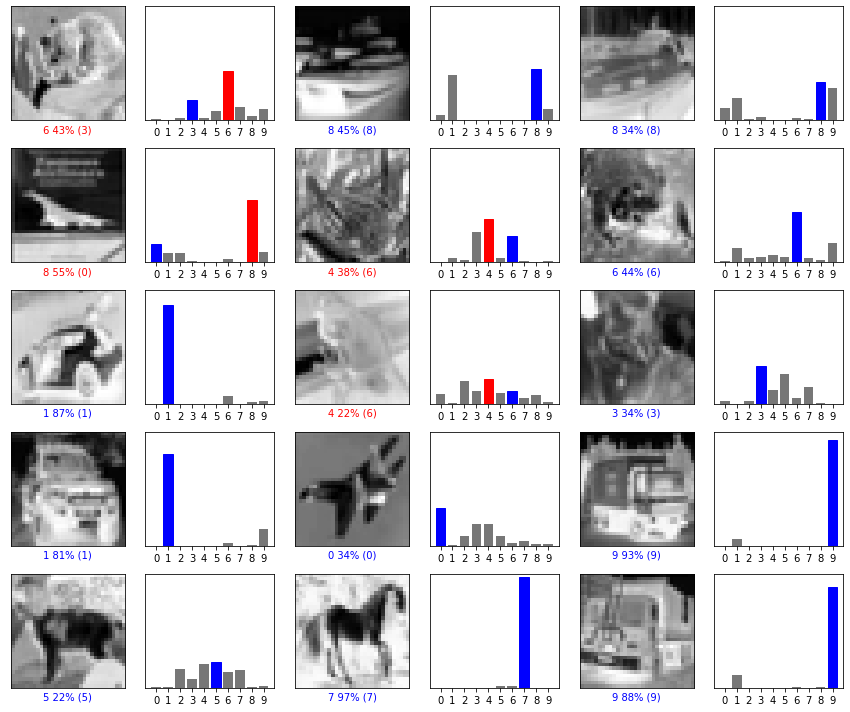

In [52]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions1[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions1[i], y_test)
plt.tight_layout()
plt.show()

## Gráfica para modelo 2

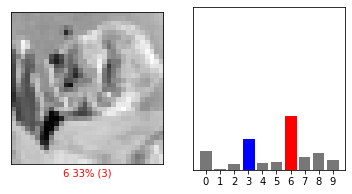

In [53]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions2[i],  y_test)
plt.show()

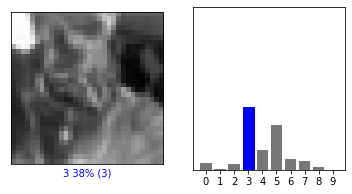

In [54]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions2[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions2[i],  y_test)
plt.show()

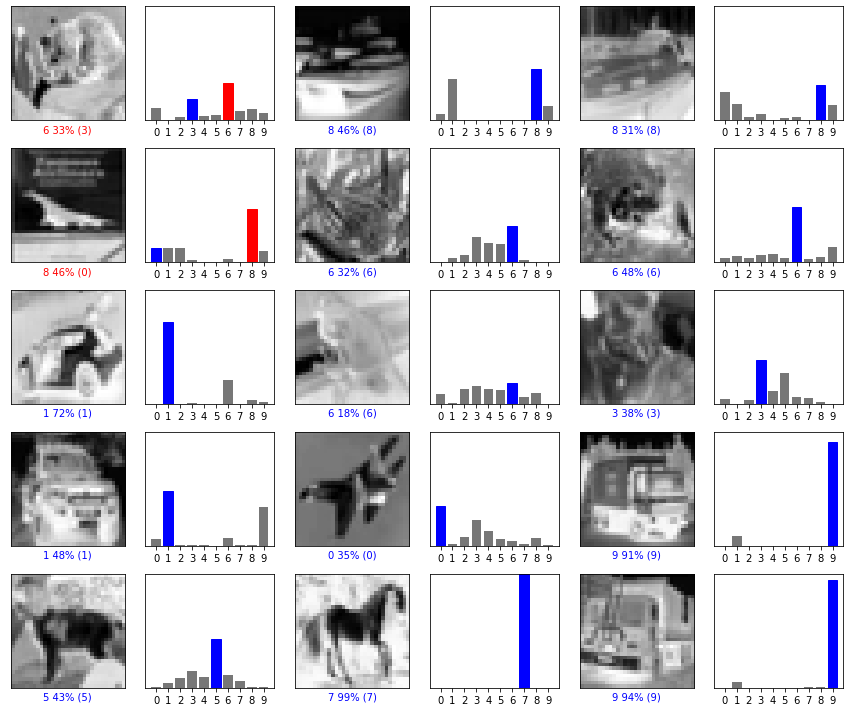

In [55]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions2[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions2[i], y_test)
plt.tight_layout()
plt.show()

---
---
---

## Ejercicio 2. Ahora trabajamos con las imágenes a color.

In [57]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [58]:
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)
print('x_train.max():', x_train.max())
print('x_train.min():', x_train.min())
print('x_test.max():', x_test.max())
print('x_test.min():', x_test.min())

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
x_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)
x_train.max(): 255
x_train.min(): 0
x_test.max(): 255
x_test.min(): 0


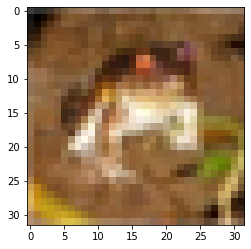

In [59]:
plt.imshow(x_train[0]);

## Normalizando

In [67]:
print('x_train.max():', x_train.max())
print('x_train.min():', x_train.min())
print('x_test.max():', x_test.max())
print('x_test.min():', x_test.min())

x_train.max(): 255
x_train.min(): 0
x_test.max(): 255
x_test.min(): 0


In [68]:
x_train = x_train / 255
x_test = x_test / 255

In [69]:
print('x_train.max():', x_train.max())
print('x_train.min():', x_train.min())
print('x_test.max():', x_test.max())
print('x_test.min():', x_test.min())

x_train.max(): 1.0
x_train.min(): 0.0
x_test.max(): 1.0
x_test.min(): 0.0


In [72]:
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
x_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)


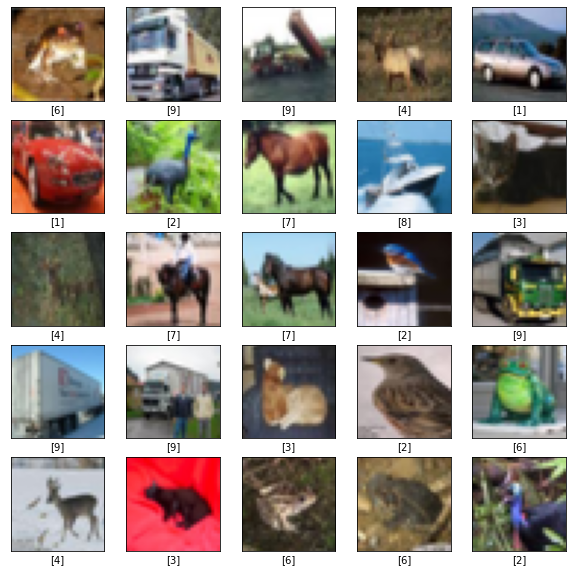

In [74]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [75]:
x_train[0].shape

(32, 32, 3)

In [76]:
model_rgb = models.Sequential()

model_rgb.add(layers.Conv2D(filters=8,
                         kernel_size=(3,3),
                         input_shape=(32,32,3)))
model_rgb.add(layers.MaxPooling2D(pool_size = (2,2)))
model_rgb.add(layers.Dropout(0.25))
model_rgb.add(layers.Flatten())
model_rgb.add(layers.Dense(32))
model_rgb.add(layers.Dense(10, activation = 'softmax'))
model_rgb.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                57632     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 58,186
Trainable params: 58,186
Non-trainable params: 0
__________________________________________________

In [77]:
model_rgb.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [78]:
model_rgb.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6154 - accuracy: 0.4310
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4479 - accuracy: 0.4958
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3977 - accuracy: 0.5124
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3601 - accuracy: 0.5259
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3408 - accuracy: 0.5330
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3155 - accuracy: 0.5463
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2967 - accuracy: 0.5541
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2820 - accuracy: 0.5575
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2624 - accuracy: 0.5621
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l

## Evaluación de los 3 modelos

In [79]:
test_loss_rgb, test_acc_rgb = model_rgb.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 1.2530 - accuracy: 0.5646


In [84]:
print('test_loss_rgb:', test_loss_rgb)
print('test_acc_rgb:', test_acc_rgb)

test_loss_rgb: 1.2530001401901245
test_acc_rgb: 0.5645999908447266


In [81]:
print('test_loss1:', test_loss1)
print('test_acc1:', test_acc1)

test_loss1: 1.3943592309951782
test_acc1: 0.5246000289916992


In [83]:
print('test_loss2:', test_loss2)
print('test_acc2:', test_acc2)

test_loss2: 1.4215725660324097
test_acc2: 0.5123000144958496


## El mejor modelo en este caso sería el que tiene las imágenes a color.

## Predicciones model_rgb

In [87]:
predictions_rgb = model_rgb.predict(x_test)

In [88]:
predictions_rgb[0]

array([0.01331265, 0.02020148, 0.02589227, 0.25774238, 0.01103289,
       0.14045595, 0.25569937, 0.00509279, 0.18225619, 0.08831414],
      dtype=float32)

In [89]:
y_test[0]

array([3], dtype=uint8)

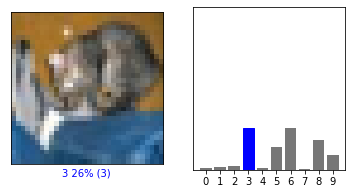

In [91]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_rgb[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions_rgb[i],  y_test)
plt.show()

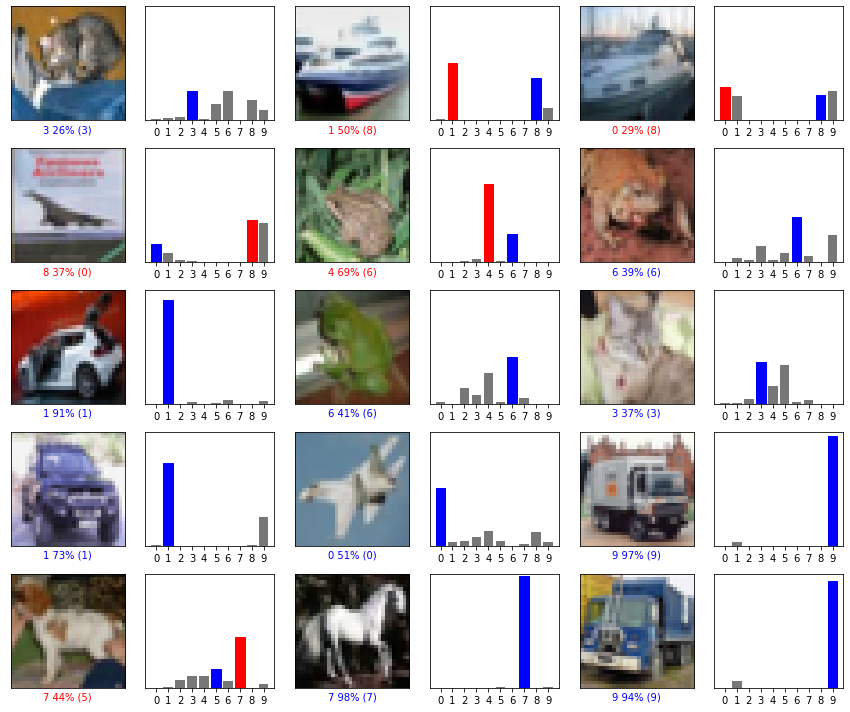

In [92]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_rgb[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_rgb[i], y_test)
plt.tight_layout()
plt.show()